In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing, tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fulldata= pd.read_csv('NoCatDataSet.csv')
fulldata

,atom_index_0,atom_index_1,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
0,1,0,84.807600,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,83.022400,0.254579,1.258620,0.272010,0.002150,-0.006031,0.001976,-0.012698,1.085804,0.008001
1,1,2,-11.257000,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.034700,0.352978,2.858390,-3.433600,0.002150,-0.006031,0.001976,1.011731,1.463751,0.000277
2,1,3,-11.254800,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.032500,0.352944,2.858520,-3.433870,0.002150,-0.006031,0.001976,-0.540815,1.447527,-0.876644
3,1,4,-11.254300,-40.52368,0.0000,0.0000,0.0000,31.3410,-1.2317,4.0544,...,-11.031900,0.352934,2.858550,-3.433930,0.002150,-0.006031,0.001976,-0.523814,1.437933,0.906397
4,2,0,84.807400,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,83.022200,0.254585,1.258610,0.272013,1.011731,1.463751,0.000277,-0.012698,1.085804,0.008001
5,2,3,-11.254100,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,-11.031700,0.352932,2.858560,-3.433950,1.011731,1.463751,0.000277,-0.540815,1.447527,-0.876644
6,2,4,-11.254800,-40.52368,0.0000,0.0000,0.0000,31.5814,1.2173,-4.1474,...,-11.032400,0.352943,2.858530,-3.433870,1.011731,1.463751,0.000277,-0.523814,1.437933,0.906397
7,3,0,84.809300,-40.52368,0.0000,0.0000,0.0000,31.5172,4.1086,1.2723,...,83.024100,0.254634,1.258560,0.272012,-0.540815,1.447527,-0.876644,-0.012698,1.085804,0.008001
8,3,4,-11.254300,-40.52368,0.0000,0.0000,0.0000,31.5172,4.1086,1.2723,...,-11.031900,0.352943,2.858560,-3.433930,-0.540815,1.447527,-0.876644,-0.523814,1.437933,0.906397
9,4,0,84.809500,-40.52368,0.0000,0.0000,0.0000,31.4029,-4.0942,-1.1793,...,83.024300,0.254628,1.258560,0.272012,-0.523814,1.437933,0.906397,-0.012698,1.085804,0.008001


In [3]:
fulldata.columns

Index(['atom_index_0', 'atom_index_1', 'scalar_coupling_constant',
       'potential_energy', 'X', 'Y', 'Z', 'XX_atom1', 'YX_atom1', 'ZX_atom1',
       'XY_atom1', 'YY_atom1', 'ZY_atom1', 'XZ_atom1', 'YZ_atom1', 'ZZ_atom1',
       'XX', 'YX', 'ZX', 'XY', 'YY', 'ZY', 'XZ', 'YZ', 'ZZ',
       'mulliken_charge_atom1', 'mulliken_charge', 'fc', 'sd', 'pso', 'dso',
       'x_atom1_structure', 'y_atom1_structure', 'z_atom1_structure', 'x', 'y',
       'z'],
      dtype='object')

In [4]:
sfeatures= fulldata.drop(['scalar_coupling_constant'], axis=1)
target= fulldata[['scalar_coupling_constant']]

In [5]:
sfeatures.columns

Index(['atom_index_0', 'atom_index_1', 'potential_energy', 'X', 'Y', 'Z',
       'XX_atom1', 'YX_atom1', 'ZX_atom1', 'XY_atom1', 'YY_atom1', 'ZY_atom1',
       'XZ_atom1', 'YZ_atom1', 'ZZ_atom1', 'XX', 'YX', 'ZX', 'XY', 'YY', 'ZY',
       'XZ', 'YZ', 'ZZ', 'mulliken_charge_atom1', 'mulliken_charge', 'fc',
       'sd', 'pso', 'dso', 'x_atom1_structure', 'y_atom1_structure',
       'z_atom1_structure', 'x', 'y', 'z'],
      dtype='object')

In [6]:
x= sfeatures.values

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
x_scaled = min_max_scaler.fit_transform(x)
x_scaled

array([[0.03571429, 0.        , 1.        , ..., 0.52233263, 0.57740502,
        0.54138343],
       [0.03571429, 0.07142857, 1.        , ..., 0.58035492, 0.59850986,
        0.54090807],
       [0.03571429, 0.10714286, 1.        , ..., 0.49242079, 0.59760387,
        0.4869416 ],
       ...,
       [0.60714286, 0.21428571, 0.51884334, ..., 0.5215183 , 0.55848776,
        0.57033875],
       [0.60714286, 0.25      , 0.51884334, ..., 0.51558114, 0.53670709,
        0.47872266],
       [0.60714286, 0.28571429, 0.51884334, ..., 0.56766928, 0.46985897,
        0.47675609]])

In [9]:
sf = pd.DataFrame(x_scaled)
sf

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.035714,0.000000,1.000000,0.512092,0.415686,0.467014,0.564976,0.450120,0.631000,0.431068,...,0.495369,0.627461,0.395724,0.832959,0.496158,0.493951,0.544750,0.522333,0.577405,0.541383
1,0.035714,0.071429,1.000000,0.512092,0.415686,0.467014,0.564976,0.450120,0.631000,0.431068,...,0.107890,0.645412,0.534960,0.399980,0.496158,0.493951,0.544750,0.580355,0.598510,0.540908
2,0.035714,0.107143,1.000000,0.512092,0.415686,0.467014,0.564976,0.450120,0.631000,0.431068,...,0.107899,0.645405,0.534972,0.399949,0.496158,0.493951,0.544750,0.492421,0.597604,0.486942
3,0.035714,0.142857,1.000000,0.512092,0.415686,0.467014,0.564976,0.450120,0.631000,0.431068,...,0.107901,0.645404,0.534974,0.399942,0.496158,0.493951,0.544750,0.493384,0.597068,0.596672
4,0.071429,0.000000,1.000000,0.512092,0.415686,0.467014,0.571274,0.529048,0.368965,0.508101,...,0.495368,0.627462,0.395723,0.832960,0.550387,0.570468,0.544649,0.522333,0.577405,0.541383
5,0.071429,0.107143,1.000000,0.512092,0.415686,0.467014,0.571274,0.529048,0.368965,0.508101,...,0.107902,0.645403,0.534975,0.399939,0.550387,0.570468,0.544649,0.492421,0.597604,0.486942
6,0.071429,0.142857,1.000000,0.512092,0.415686,0.467014,0.571274,0.529048,0.368965,0.508101,...,0.107899,0.645405,0.534972,0.399949,0.550387,0.570468,0.544649,0.493384,0.597068,0.596672
7,0.107143,0.000000,1.000000,0.512092,0.415686,0.467014,0.569592,0.622230,0.542116,0.599053,...,0.495376,0.627471,0.395719,0.832960,0.466993,0.569623,0.492365,0.522333,0.577405,0.541383
8,0.107143,0.142857,1.000000,0.512092,0.415686,0.467014,0.569592,0.622230,0.542116,0.599053,...,0.107901,0.645405,0.534975,0.399942,0.466993,0.569623,0.492365,0.493384,0.597068,0.596672
9,0.142857,0.000000,1.000000,0.512092,0.415686,0.467014,0.566597,0.357866,0.463791,0.341022,...,0.495377,0.627470,0.395719,0.832960,0.467906,0.569124,0.598674,0.522333,0.577405,0.541383


In [10]:
normfeat= sf.rename(columns={0: 'atom_index_0', 1:'atom_index_1', 2:'potential_energy', 3: 'X', 4: 'Y', 5: 'Z',
                       6: 'XX_atom1', 7: 'YX_atom1', 8: 'ZX_atom1', 9: 'XY_atom1', 10: 'YY_atom1', 
                       11: 'ZY_atom1',12: 'XZ_atom1', 13: 'YZ_atom1', 14: 'ZZ_atom1',
       15: 'XX', 16: 'YX', 17: 'ZX', 18: 'XY', 19: 'YY', 20:'ZY', 21:'XZ', 22:'YZ', 23:'ZZ',
       24: 'mulliken_charge_atom1', 25: 'mulliken_charge', 26: 'fc', 27: 'sd', 28:'pso',29: 'dso',
       30:'x_atom1_structure', 31:'y_atom1_structure', 32:'z_atom1_structure', 33:'x', 34:'y', 35:'z'
                      })
normfeat

,atom_index_0,atom_index_1,potential_energy,X,Y,Z,XX_atom1,YX_atom1,ZX_atom1,XY_atom1,...,fc,sd,pso,dso,x_atom1_structure,y_atom1_structure,z_atom1_structure,x,y,z
0,0.035714,0.000000,1.000000,0.512092,0.415686,0.467014,0.564976,0.450120,0.631000,0.431068,...,0.495369,0.627461,0.395724,0.832959,0.496158,0.493951,0.544750,0.522333,0.577405,0.541383
1,0.035714,0.071429,1.000000,0.512092,0.415686,0.467014,0.564976,0.450120,0.631000,0.431068,...,0.107890,0.645412,0.534960,0.399980,0.496158,0.493951,0.544750,0.580355,0.598510,0.540908
2,0.035714,0.107143,1.000000,0.512092,0.415686,0.467014,0.564976,0.450120,0.631000,0.431068,...,0.107899,0.645405,0.534972,0.399949,0.496158,0.493951,0.544750,0.492421,0.597604,0.486942
3,0.035714,0.142857,1.000000,0.512092,0.415686,0.467014,0.564976,0.450120,0.631000,0.431068,...,0.107901,0.645404,0.534974,0.399942,0.496158,0.493951,0.544750,0.493384,0.597068,0.596672
4,0.071429,0.000000,1.000000,0.512092,0.415686,0.467014,0.571274,0.529048,0.368965,0.508101,...,0.495368,0.627462,0.395723,0.832960,0.550387,0.570468,0.544649,0.522333,0.577405,0.541383
5,0.071429,0.107143,1.000000,0.512092,0.415686,0.467014,0.571274,0.529048,0.368965,0.508101,...,0.107902,0.645403,0.534975,0.399939,0.550387,0.570468,0.544649,0.492421,0.597604,0.486942
6,0.071429,0.142857,1.000000,0.512092,0.415686,0.467014,0.571274,0.529048,0.368965,0.508101,...,0.107899,0.645405,0.534972,0.399949,0.550387,0.570468,0.544649,0.493384,0.597068,0.596672
7,0.107143,0.000000,1.000000,0.512092,0.415686,0.467014,0.569592,0.622230,0.542116,0.599053,...,0.495376,0.627471,0.395719,0.832960,0.466993,0.569623,0.492365,0.522333,0.577405,0.541383
8,0.107143,0.142857,1.000000,0.512092,0.415686,0.467014,0.569592,0.622230,0.542116,0.599053,...,0.107901,0.645405,0.534975,0.399942,0.466993,0.569623,0.492365,0.493384,0.597068,0.596672
9,0.142857,0.000000,1.000000,0.512092,0.415686,0.467014,0.566597,0.357866,0.463791,0.341022,...,0.495377,0.627470,0.395719,0.832960,0.467906,0.569124,0.598674,0.522333,0.577405,0.541383


In [11]:
type(sf)

pandas.core.frame.DataFrame

In [96]:
linear= LinearRegression()
mse= cross_val_score(linear, normfeat, target, scoring='neg_mean_squared_error', cv= 20)
mean_mse= np.mean(mse)
print(mean_mse)

-6.6983681597046e-09


In [97]:
ridge= Ridge()
parameters={'alpha': [1e-10, 1e-5, 1e-2, 1, 10, 50, 100, 500, 1000]}
ridgereg= GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv= 15)
ridgereg.fit(normfeat, target)
print('ridge param: ', ridgereg.best_params_)
print('ridge score: ', ridgereg.best_score_)
ridgereg

ridge param:  {'alpha': 1e-10}
ridge score:  -6.6983777668475386e-09


GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 10, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [98]:
lasso= Lasso()
parameters={'alpha': [1e-10, 1e-5, 1e-2, 1, 10, 50, 100, 500, 1000]}
lassoreg= GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
lassoreg.fit(normfeat, target)
print('lasso param: ', lassoreg.best_params_)
print('lasso score: ', lassoreg.best_score_)

lasso param:  {'alpha': 1e-10}
lasso score:  -1.125372584800626e-05


In [12]:
f_train, f_test, t_train, t_test= train_test_split(normfeat, target, test_size=.15, random_state=4)

In [100]:
print('total feature training features: ', len(f_train))
print('total feature testing features: ', len(f_test))
print('total target training features: ', len(t_train))
print('total target testing features: ', len(t_test))

total feature training features:  3959424
total feature testing features:  698723
total target training features:  3959424
total target testing features:  698723


In [101]:
print('feature train shape: ', f_train.shape)
print('target train shape: ', t_train.shape)

feature train shape:  (3959424, 36)
target train shape:  (3959424, 1)


In [102]:
mse1= cross_val_score(linear, f_train, t_train, scoring='neg_mean_squared_error', cv= 20)
mean_mse1= np.mean(mse1)
print(mean_mse1)

-6.696073241133201e-09


In [103]:
ridgereg1= GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
ridgereg1.fit(f_train, t_train)
print('ridge1 param: ', ridgereg1.best_params_)
print('ridge1 score: ', ridgereg1.best_score_)

ridge1 param:  {'alpha': 1e-10}
ridge1 score:  -6.696073282096222e-09


In [104]:
lassoreg1= GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv= 20)
lassoreg1.fit(f_train, t_train)
print('lasso1 param: ', lassoreg1.best_params_)
print('lasso1 score: ', lassoreg1.best_score_)

lasso1 param:  {'alpha': 1e-10}
lasso1 score:  -1.2668638258128781e-05


In [105]:
ridgereg1.score(f_test, t_test)

-6.711493757241063e-09

In [106]:
ridgepredict=ridgereg1.predict(f_test)

In [107]:
actualtest=np.array(t_test)

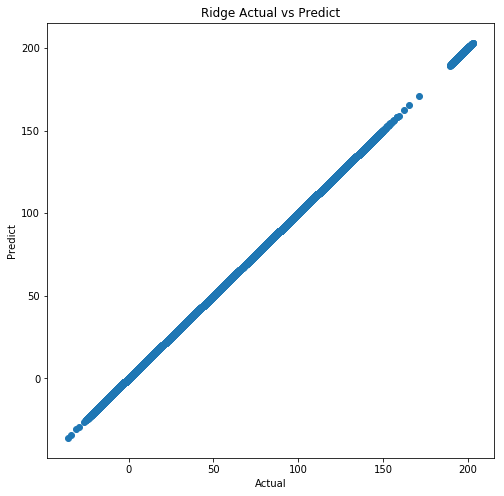

In [108]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(actualtest, ridgepredict)
ax.set(title="Ridge Actual vs Predict")
ax.set(xlabel="Actual", ylabel="Predict");

In [110]:
checkcoef=pd.Series(f_train.columns)
checkcoef=checkcoef.rename('Features')
checkcoef
ccdf= pd.DataFrame(checkcoef)
ccdf

,Features
0,atom_index_0
1,atom_index_1
2,potential_energy
3,X
4,Y
5,Z
6,XX_atom1
7,YX_atom1
8,ZX_atom1
9,XY_atom1


In [112]:
linear.fit(f_train, t_train)
linlist=(linear.coef_.tolist())
linseries=pd.Series(linlist)
linseries=linseries.apply(pd.Series).stack().reset_index(drop=True)
linseries= linseries.rename('LinReg')
lindf= pd.DataFrame(linseries)
lindf

,LinReg
0,-8.872818e-08
1,4.201784e-07
2,-2.156367e-07
3,-1.157235e-06
4,1.457696e-06
5,-2.321166e-07
6,-7.250249e-07
7,-7.103373e-08
8,7.358189e-07
9,3.041853e-07


In [113]:
num= list(range(0,36))
num= pd.DataFrame(num)
num= num.rename(columns={0:'num'})
num

,num
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [116]:
combined= pd.concat([ccdf, lindf], axis=1)
combined

,Features,LinReg
0,atom_index_0,-8.872818e-08
1,atom_index_1,4.201784e-07
2,potential_energy,-2.156367e-07
3,X,-1.157235e-06
4,Y,1.457696e-06
5,Z,-2.321166e-07
6,XX_atom1,-7.250249e-07
7,YX_atom1,-7.103373e-08
8,ZX_atom1,7.358189e-07
9,XY_atom1,3.041853e-07


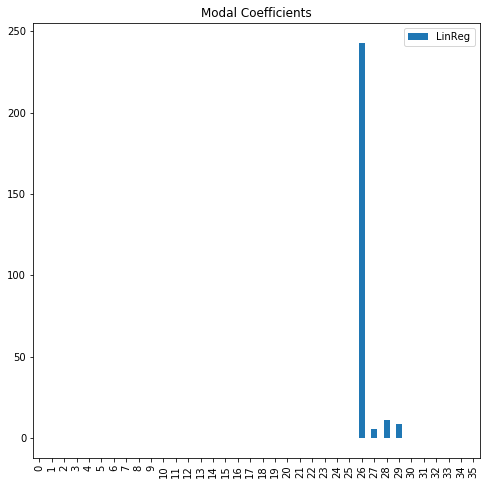

In [119]:
combined.plot(kind="bar",title='Modal Coefficients')

In [120]:
ridgereg1.fit(f_train, t_train)

GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 1, 10, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [121]:
r=ridgereg1.best_estimator_
r= (r.coef_.tolist())
ridgeseries=pd.Series(r)
ridgeseries=ridgeseries.apply(pd.Series).stack().reset_index(drop=True)
ridgeseries= ridgeseries.rename('RidgeReg')
ridgedf= pd.DataFrame(ridgeseries)
ridgedf

,RidgeReg
0,-8.872777e-08
1,4.201779e-07
2,-2.156367e-07
3,-1.157235e-06
4,1.457696e-06
5,-2.321166e-07
6,-7.250250e-07
7,-7.103377e-08
8,7.358190e-07
9,3.041854e-07


In [122]:
rcombined= pd.concat([ccdf, ridgedf], axis=1)
rcombined

,Features,RidgeReg
0,atom_index_0,-8.872777e-08
1,atom_index_1,4.201779e-07
2,potential_energy,-2.156367e-07
3,X,-1.157235e-06
4,Y,1.457696e-06
5,Z,-2.321166e-07
6,XX_atom1,-7.250250e-07
7,YX_atom1,-7.103377e-08
8,ZX_atom1,7.358190e-07
9,XY_atom1,3.041854e-07


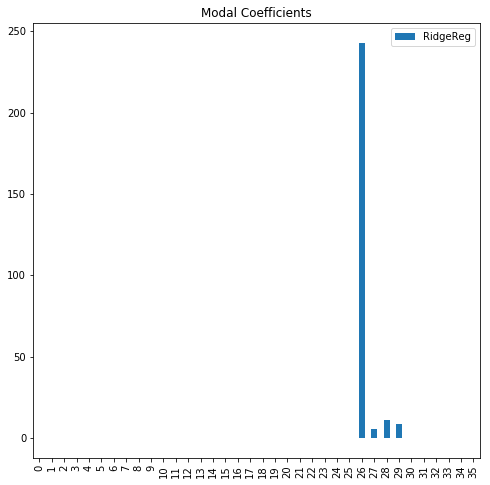

In [123]:
rcombined.plot(kind='bar', title='Modal Coefficients')

Random Forest Modeling

Decision Tree

In [21]:
DTR= tree.DecisionTreeRegressor(max_depth=75, min_samples_split=3, min_samples_leaf=5, random_state=1)
DTR.fit(f_train, t_train)

DecisionTreeRegressor(criterion='mse', max_depth=75, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [22]:
DTR.score(f_train,t_train)

0.9999995714213553

In [23]:
DTR.score(f_test,t_test)

0.999997998720172

In [24]:
predict=DTR.predict(f_test)
tt_np= t_test.to_numpy()

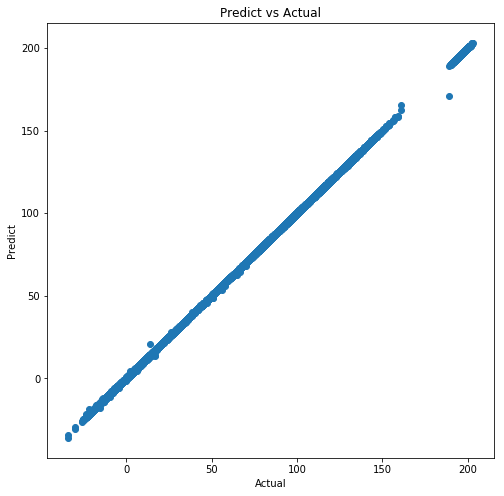

In [25]:
plt.rcParams["figure.figsize"] = (8, 8)
fig, ax = plt.subplots()
ax.scatter(predict, tt_np)
ax.set(title="Predict vs Actual")
ax.set(xlabel="Actual", ylabel="Predict");

Random Forest

In [52]:
parameter={
 'criterion': ['mse'],
 'max_depth': [4],
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [2],
 'n_estimators': (100, 250),
 'random_state': [1], 'verbose': [0]}

In [53]:
grid= GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameter, n_jobs=-1)
grid

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_d

In [54]:
gridresult= grid.fit(f_train, t_train)
gridresult

/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_d

In [55]:
gridbestparam= gridresult.best_params_
gridbestparam

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 250,
 'random_state': 1,
 'verbose': 0}

In [58]:
gridresult.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [56]:
tune1= RandomForestRegressor(max_depth=gridbestparam['max_depth'], n_estimators=gridbestparam['n_estimators'],
                            criterion=gridbestparam['criterion'], min_samples_leaf=gridbestparam['min_samples_leaf'],
                            min_samples_split=gridbestparam['min_samples_split'], random_state=1, n_jobs=-1, verbose=0)

In [57]:
tune1

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [61]:
tune1.fit(f_train, t_train)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [62]:
trainpredict= tune1.predict(f_train)
trainpredict

array([84.09338798,  3.11605193, -0.16908387, ...,  3.11605193,
       -0.16908387,  8.32294851])

In [63]:
testpredict= tune1.predict(f_test)
testpredict

array([-0.16908387, 84.09338798,  8.32294851, ...,  8.32294851,
        8.32294851, -0.16908387])

In [64]:
trainaccuracy= tune1.score(f_train, t_train)
trainaccuracy

0.9965227893822521

In [65]:
testaccuracy= tune1.score(f_test, t_test)
testaccuracyuiiuu8hguhb

0.9965287791658614

RF 2

In [13]:
parameter2={
 'criterion': ['mse'],
 'max_depth': (4, 6, 8),
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [2],
 'n_estimators': (300, 400, 500),
 'random_state': [1], 'verbose': [0]}

In [15]:
grid2= GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameter2, n_jobs=-1)
grid2

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse'], 'max_d

In [ ]:
gridresult2= grid2.fit(f_train, t_train)
gridresult2

/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
gridbestparam2= gridresult2.best_params_
gridbestparam2

In [ ]:
gridresult2.best_estimator_

In [ ]:
print('hello, im done')